In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
%config IPCompleter.greedy=True
%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#for hypothisis testing
from scipy.stats import chi2_contingency 
from datetime import datetime, timedelta
import math
#import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')



from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,normalize


#import xgboost, lightgbm
#from mlxtend.classifier import EnsembleVoteClassifier

In [2]:
#most tergated destination ip address
#most logical ports attack
#most frequently common type of attack
#Different time of the day(odd hours, day or night)
#finding the pattern 

In [4]:
df_train=pd.read_csv('NACD_training.csv')
df_train.shape
df_test=pd.read_csv('NACD_testing.csv')
df_test.shape

(82332, 45)

(175341, 45)

In [3]:
df_train.describe

<bound method NDFrame.describe of           id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_s

In [5]:
df_train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [5]:
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


<Axes: >

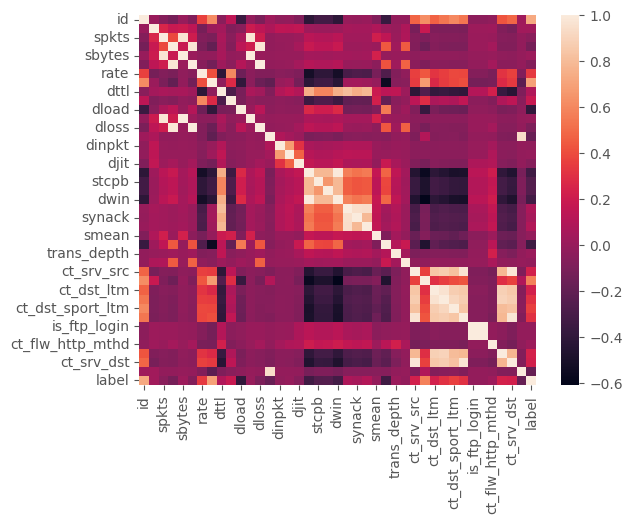

In [6]:
sns.heatmap(df_test.corr())

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [6]:
df_com = pd.concat([df_train, df_test])

df_combined=df_com.drop(['ackdat', 'ct_ftp_cmd', 'djit', 'is_ftp_login', 'is_sm_ips_ports', 'response_body_len', 'sjit', 'synack', 'tcprtt','smean','id','dload','trans_depth','ct_flw_http_mthd', 'dinpkt','label'], axis=1)
df_train=df_com.drop(['ackdat', 'ct_ftp_cmd', 'djit', 'is_ftp_login', 'is_sm_ips_ports', 'response_body_len', 'sjit', 'synack', 'tcprtt','smean','id','dload','trans_depth','ct_flw_http_mthd', 'dinpkt','label'], axis=1)
df_test=df_com.drop(['ackdat', 'ct_ftp_cmd', 'djit', 'is_ftp_login', 'is_sm_ips_ports', 'response_body_len', 'sjit', 'synack', 'tcprtt','smean','id','dload','trans_depth','ct_flw_http_mthd', 'dinpkt','label'], axis=1)



In [10]:
df_train.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'sloss', 'dloss', 'sinpkt',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'attack_cat'],
      dtype='object')

In [9]:
df_combined.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,attack_cat
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,0,2,2,1,1,1,2,1,2,Normal
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,0,2,2,1,1,1,2,1,2,Normal
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,0,3,2,1,1,1,3,1,3,Normal
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,0,3,2,2,2,1,3,2,3,Normal
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,0,3,2,2,2,1,3,2,3,Normal


<Axes: >

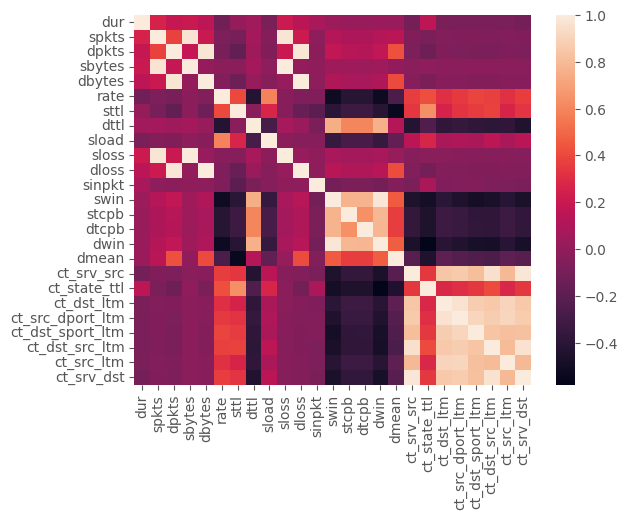

In [8]:
sns.heatmap(df_combined.corr())

In [9]:
df_combined.corr(method='pearson')


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,sloss,...,dwin,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst
dur,1.000000,0.258890,0.188382,0.204422,0.149705,-0.118622,0.008617,0.053580,-0.079202,0.207223,...,0.027009,0.029999,-0.106030,0.156859,-0.080883,-0.090267,-0.088422,-0.090921,-0.079126,-0.107793
spkts,0.258890,1.000000,0.383221,0.964393,0.203804,-0.073668,-0.099579,0.063234,-0.049232,0.971859,...,0.127331,0.147472,-0.065800,-0.081957,-0.056025,-0.063234,-0.066604,-0.072036,-0.057480,-0.066118
dpkts,0.188382,0.383221,1.000000,0.184280,0.973445,-0.093065,-0.183142,0.047416,-0.062484,0.199640,...,0.172427,0.426542,-0.073659,-0.140279,-0.065177,-0.078324,-0.084943,-0.087176,-0.069019,-0.073238
sbytes,0.204422,0.964393,0.184280,1.000000,0.009969,-0.027353,-0.019939,0.058397,-0.017320,0.995772,...,0.048363,-0.004396,-0.033051,-0.010485,-0.025157,-0.024496,-0.024965,-0.029291,-0.025494,-0.033095
dbytes,0.149705,0.203804,0.973445,0.009969,1.000000,-0.055538,-0.128600,0.019371,-0.037318,0.016448,...,0.104619,0.405260,-0.041784,-0.084006,-0.038026,-0.046258,-0.050583,-0.050668,-0.041286,-0.041118
rate,-0.118622,-0.073668,-0.093065,-0.027353,-0.055538,1.000000,0.400967,-0.426766,0.587503,-0.041993,...,-0.528679,-0.268470,0.359295,0.417419,0.315193,0.350931,0.383672,0.376051,0.316011,0.364168
sttl,0.008617,-0.099579,-0.183142,-0.019939,-0.128600,0.400967,1.000000,-0.032471,0.269001,-0.042622,...,-0.415248,-0.544706,0.334824,0.631431,0.254498,0.325302,0.358632,0.380792,0.261206,0.328775
dttl,0.053580,0.063234,0.047416,0.058397,0.019371,-0.426766,-0.032471,1.000000,-0.285242,0.070323,...,0.763755,0.128556,-0.424964,-0.248080,-0.380788,-0.361507,-0.380438,-0.392213,-0.378975,-0.437934
sload,-0.079202,-0.049232,-0.062484,-0.017320,-0.037318,0.587503,0.269001,-0.285242,1.000000,-0.027949,...,-0.354221,-0.181026,0.144349,0.269534,0.081328,0.104451,0.083601,0.155950,0.092978,0.147013
sloss,0.207223,0.971859,0.199640,0.995772,0.016448,-0.041993,-0.042622,0.070323,-0.027949,1.000000,...,0.078696,0.016252,-0.043506,-0.032560,-0.035006,-0.036784,-0.038239,-0.042444,-0.036478,-0.043785


In [7]:
# Contaminsation mean pollution (outliers) in data
tmp = df_train.where(df_train['attack_cat'] == "Normal").dropna()
contamination = round(1 - len(tmp)/len(df_train), 2)
print("train contamination ", contamination)

tmp = df_test.where(df_test['attack_cat'] == "Normal").dropna()
print("test  contamination ", round(1 - len(tmp)/len(df_test),2),'\n')

if contamination > 0.5:
    print(f'contamination is {contamination}, which is greater than 0.5.')


train contamination  0.64
test  contamination  0.64 

contamination is 0.64, which is greater than 0.5.


<Figure size 1800x700 with 0 Axes>

<AxesSubplot:>

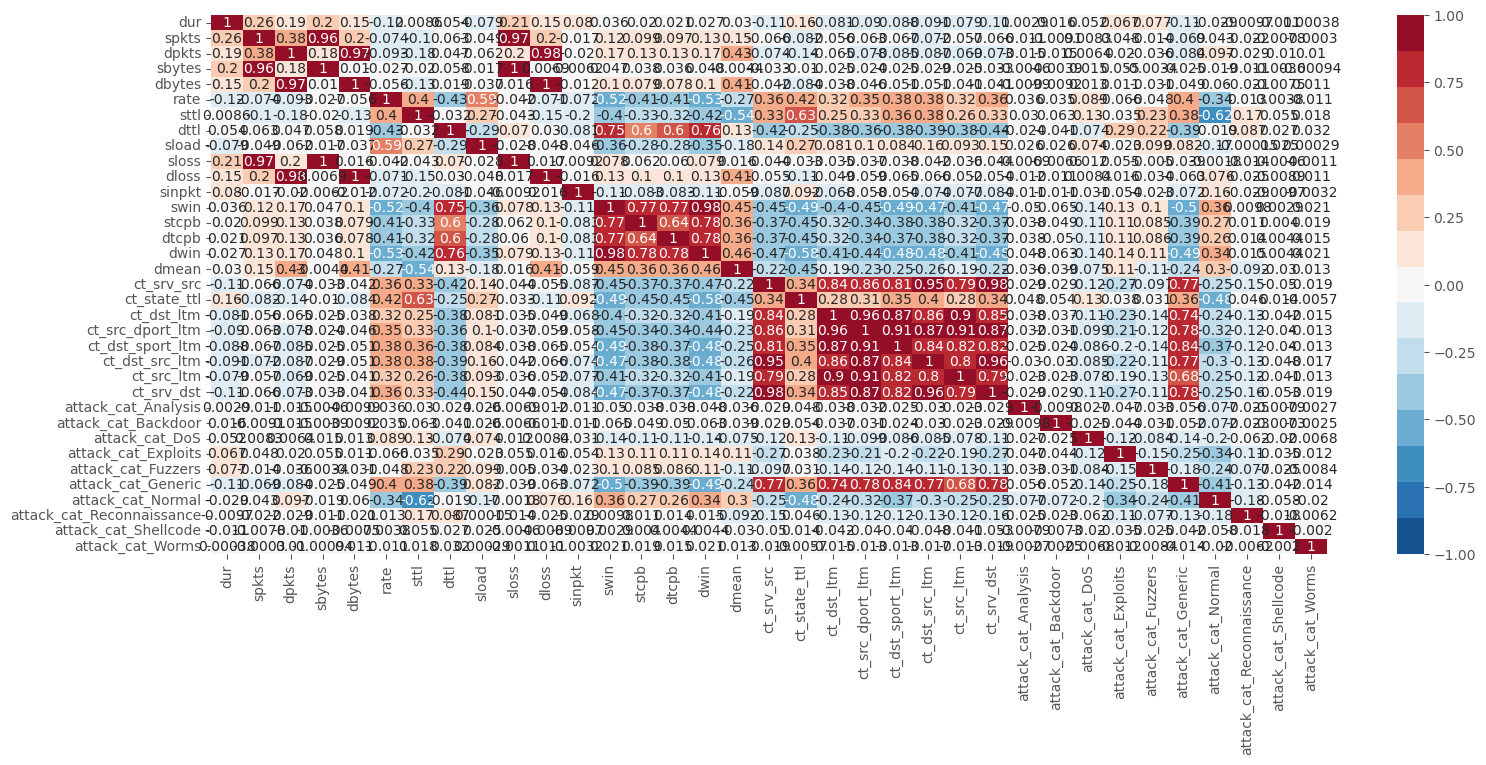

In [8]:
df_dummies = pd.get_dummies(df_combined, columns=['attack_cat'])
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='pearson'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

In [9]:
catagory = df_combined['attack_cat']

print("attack cat:", set(list(catagory))) # use print to make it print on single line
df_combined['attack_cat'].value_counts()*100/df_combined['attack_cat'].value_counts().sum()

attack cat: {'Reconnaissance', 'Shellcode', 'Fuzzers', 'Generic', 'Analysis', 'Exploits', 'DoS', 'Backdoor', 'Worms', 'Normal'}


Normal            36.092256
Generic           22.847175
Exploits          17.279653
Fuzzers            9.409601
DoS                6.346416
Reconnaissance     5.428198
Analysis           1.038914
Backdoor           0.903859
Shellcode          0.586402
Worms              0.067527
Name: attack_cat, dtype: float64

<Figure size 1800x600 with 0 Axes>

<Axes: ylabel='attack_cat'>

Text(0.5, 0, 'Attack Category')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Number of attacks per Attack caterogy')

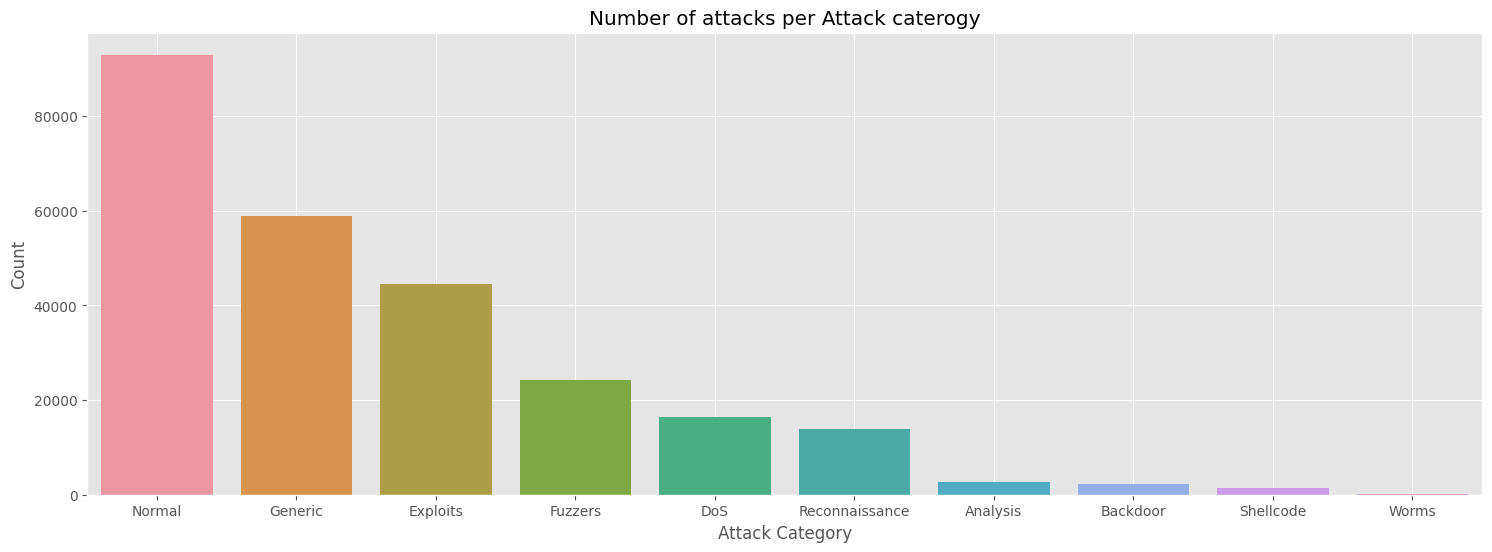

In [13]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_combined['attack_cat'].value_counts().index,y=df_combined['attack_cat'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')
plt.grid(True)

In [14]:
pd.DataFrame(df_combined['attack_cat'].value_counts())[:]

,attack_cat
Normal,93000
Generic,58871
Exploits,44525
Fuzzers,24246
DoS,16353
Reconnaissance,13987
Analysis,2677
Backdoor,2329
Shellcode,1511
Worms,174


In [15]:
le_target = LabelEncoder()
le = LabelEncoder()

catagory = df_combined['attack_cat']

print("attack cat:", set(list(catagory))) # use print to make it print on single line 

df_combined['attack_cat'] = le_target.fit_transform(catagory)
df_combined['proto'] = le.fit_transform(df_combined['proto'])
df_combined['service'] = le.fit_transform(df_combined['service'])
df_combined['state'] = le.fit_transform(df_combined['state'])

#print("mode", len(np.where(catagory.values==6)[0])/len(catagory),"%")

attack cat: {'Exploits', 'Analysis', 'Reconnaissance', 'DoS', 'Normal', 'Generic', 'Shellcode', 'Backdoor', 'Worms', 'Fuzzers'}


In [16]:
le_ta_train = LabelEncoder()
le_train = LabelEncoder()

catagory_train = df_train['attack_cat']

print("attack cat:", set(list(catagory_train))) # use print to make it print on single line 

df_train['attack_cat'] = le_ta_train.fit_transform(catagory_train)
df_train['proto'] = le_train.fit_transform(df_train['proto'])
df_train['service'] = le_train.fit_transform(df_train['service'])
df_train['state'] = le_train.fit_transform(df_train['state'])

#print("mode", len(np.where(catagory.values==6)[0])/len(catagory),"%")

attack cat: {'Exploits', 'Analysis', 'Reconnaissance', 'DoS', 'Normal', 'Generic', 'Shellcode', 'Backdoor', 'Worms', 'Fuzzers'}


In [17]:
le_ta_test = LabelEncoder()
le_test = LabelEncoder()

catagory_test = df_test['attack_cat']

print("attack cat:", set(list(catagory_test))) # use print to make it print on single line 

df_test['attack_cat'] = le_ta_test.fit_transform(catagory_test)
df_test['proto'] = le_test.fit_transform(df_test['proto'])
df_test['service'] = le_test.fit_transform(df_test['service'])
df_test['state'] = le_test.fit_transform(df_test['state'])

#print("mode", len(np.where(catagory.values==6)[0])/len(catagory),"%")

attack cat: {'Exploits', 'Analysis', 'Reconnaissance', 'DoS', 'Normal', 'Generic', 'Shellcode', 'Backdoor', 'Worms', 'Fuzzers'}


In [18]:
le_target.inverse_transform([0,1,2,3,4,5,6,7,8,9])
df_combined.head(3)

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,attack_cat
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,0,2,2,1,1,1,2,1,2,6
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,0,2,2,1,1,1,2,1,2,6
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,0,3,2,1,1,1,3,1,3,6


In [19]:
le_ta_train.inverse_transform([0,1,2,3,4,5,6,7,8,9])
le_ta_test.inverse_transform([0,1,2,3,4,5,6,7,8,9])

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [20]:
df_combined.shape

(257673, 29)

In [23]:
df_combined.describe

<bound method NDFrame.describe of              dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0       0.000011    119        0      5      2      0     496       0   
1       0.000008    119        0      5      2      0    1762       0   
2       0.000005    119        0      5      2      0    1068       0   
3       0.000006    119        0      5      2      0     900       0   
4       0.000010    119        0      5      2      0    2126       0   
...          ...    ...      ...    ...    ...    ...     ...     ...   
175336  0.000009    119        2      5      2      0     114       0   
175337  0.505762    113        0      4     10      8     620     354   
175338  0.000009    119        2      5      2      0     114       0   
175339  0.000009    119        2      5      2      0     114       0   
175340  0.000009    119        2      5      2      0     114       0   

                 rate  sttl  ...  dmean  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
0       

In [24]:
df_combined.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'sloss', 'dloss', 'sinpkt',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'attack_cat'],
      dtype='object')

In [25]:
df_train.shape
df_test.shape

(257673, 29)

(257673, 29)

# Spliting the df_combine dataframe


In [21]:
data_x = df_combined.drop(['attack_cat'], axis=1) 
data_y = df_combined.loc[:,['attack_cat']]

# del combined_data # free mem
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=.20, random_state=42) 

#     # Model Building


# 1- Random Forest algorithm

In [28]:
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix

In [29]:
#  Accuracy on the train dataset

clf = RandomForestClassifier(n_estimators=150, random_state=42)

randomModel=clf.fit(X_train, y_train)

train_pred=randomModel.predict(X_train)

accuracy_score(y_train,train_pred)

0.916240576701045

In [30]:
#  Accuracy on the train dataset

train_pred=randomModel.predict(X_train)

accuracy_score(y_train,train_pred)

0.916240576701045

In [31]:
# Accuracy on the test dataset

prediction=randomModel.predict(X_test)

accuracy_score(y_test,prediction)

0.82891238963811

# 2-Extra Trees Algorithm

In [32]:
#  Accuracy on the train dataset

clf = ExtraTreesClassifier(n_estimators=200, random_state=42)

randomModel2=clf.fit(X_train, y_train)

train_pred2=randomModel2.predict(X_train)

accuracy_score(y_train,train_pred2)

0.9162502789393513

In [33]:
# Accuracy on the test dataset
train_pred2=randomModel2.predict(X_train)

accuracy_score(y_train,train_pred2)

0.9162502789393513

In [34]:
# Accuracy on the test dataset

prediction2=randomModel2.predict(X_test)

accuracy_score(y_test,prediction2)

0.8233045503056176

# 3-Logistic Regression Algorithm

In [39]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)

logModel=clf.fit(X_train, y_train)

In [40]:
# Accuracy on the train dataset

train_log= logModel.predict(X_train)

accuracy_score(y_train,train_log)

0.4888860860200448

In [41]:
# Accuracy on the test dataset

pred=logModel.predict(X_test)

accuracy_score(y_test,pred)

0.4924614339769089

# 4-KNN Algorithm for  Manhattan p=1 (K-Nearest Neighbors)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
#p=1, manhattan distance
KNN=KNeighborsClassifier(n_neighbors=50, metric='minkowski', p=1)

KNN_Model=KNN.fit(X_train, y_train)

train_pred3=KNN_Model.predict(X_train)

accuracy_score(y_train,train_pred3)

0.6859239926651078

In [51]:
# Accuracy on the test dataset
train_pred3=KNN_Model.predict(X_train)

accuracy_score(y_train,train_pred3)

0.6859239926651078

In [59]:
# Accuracy on the test dataset

prediction3=KNN_Model.predict(X_test)

accuracy_score(y_test,prediction3)


0.6655476860386146

# 4-KNN Algorithm for Minwaski p=2 (K-Nearest Neighbors)

In [53]:
#p=1, Minwaski distance
KNN2=KNeighborsClassifier(n_neighbors=50, metric='minkowski', p=2)

KNN_Model2=KNN2.fit(X_train, y_train)

train_pred4=KNN_Model2.predict(X_train)

accuracy_score(y_train,train_pred4)

0.683537242041739

In [54]:
# Accuracy on the test dataset
train_pred4=KNN_Model2.predict(X_train)

accuracy_score(y_train,train_pred4)

0.683537242041739

In [58]:
# Accuracy on the test dataset

prediction4=KNN_Model2.predict(X_test)

accuracy_score(y_test,prediction4)

0.6652566217133986

# 5-Support Vector Machine(SVM) Algorithm

In [45]:
from sklearn import svm

In [ ]:
clf = svm.SVC(decision_function_shape='ovo')

SVM_Model=clf.fit(X_train, y_train)

train_pred5=SVM_Model.predict(X_train)

accuracy_score(y_train,train_pred5)

In [ ]:
# Accuracy on the test dataset
train_pred5=SVM_Model.predict(X_train)

accuracy_score(y_train,train_pred5)

In [ ]:
# Accuracy on the test dataset

prediction5=SVM_Model.predict(X_test)

accuracy_score(y_test,prediction5)

# 6-Decision Tree Algorithm

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf=DecisionTreeClassifier()

DTC_Model=clf.fit(X_train, y_train)

train_pred6=DTC_Model.predict(X_train)

accuracy_score(y_train,train_pred6)

0.9162502789393513

In [30]:
# Accuracy on the test dataset
train_pred6=DTC_Model.predict(X_train)

accuracy_score(y_train,train_pred6)

0.9162502789393513

In [31]:
# Accuracy on the test dataset

prediction6=DTC_Model.predict(X_test)

accuracy_score(y_test,prediction6)

0.8107305714562918

# 7-Naive Bayes Algorithm

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
NB= GaussianNB()

NB_Model=NB.fit(X_train, y_train)

train_pred7=NB_Model.predict(X_train)

accuracy_score(y_train,train_pred7)

0.4687490904151588

In [34]:
# Accuracy on the test dataset
train_pred7=NB_Model.predict(X_train)

accuracy_score(y_train,train_pred7)

0.4687490904151588

In [35]:
# Accuracy on the test dataset

prediction7=NB_Model.predict(X_test)

accuracy_score(y_test,prediction7)

0.4724944212671

# Preprocessing for Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
Sc=MinMaxScaler(feature_range=(0,1))
X_train1=Sc.fit_transform(X_train)
X_test1=Sc.fit_transform(X_test)
#y_train=y_train.reshape(-1,1)
y_train1=Sc.fit_transform(y_train)

# 8-Polynomial Regression Algorithm

In [39]:
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression


In [31]:
poly_regr = PolynomialFeatures(degree = 4) # our polynomial model is of order
X_poly = poly_regr.fit_transform(X_train) # transforms the features to the polynomial form
lin_reg_2 = LinearRegression() # creates a linear regression object
lin_reg_2.fit(X_poly, y) # 



#accuracy_score(y_train,train_pred8_MLR)

NameError: name 'load_boston' is not defined

In [30]:
# Accuracy on the test dataset
train_pred8=LR_Model.predict(X_train)

#accuracy_score(y_train,train_pred8)

In [ ]:
# Accuracy on the test dataset

prediction8=LR_Model.predict(X_test)

accuracy_score(y_test,prediction8)